# Python for Linear Regression

In [5]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as pyplot
import pickle
from sklearn import linear_model
from sklearn.utils import shuffle
from matplotlib import style

In [6]:
data = pd.read_csv("student-mat.csv", sep=";")
print(data.head())
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
   G1  G2  G3  studytime  failures  absences
0   5   6   6          2         0         

In [7]:
predict = "G3"
x = np.array(data.drop(predict, axis=1))
y = np.array(data[predict])

In [8]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.1)

In [9]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print(acc)

0.7787929465798705


In [10]:
with open("studentmodel.pickle", "wb") as f:
    pickle.dump(linear, f)
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

In [11]:
print("coefficient: ", linear.coef_)
print("Intercept: ", linear.intercept_)



coefficient:  [ 0.12696729  0.98498561 -0.13539823 -0.31480803  0.04000037]
Intercept:  -1.3360595169370235


In [12]:
predictions = linear.predict(x_test)
for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

18.37750199625181 [18 18  4  0  6] 18
13.160103755434333 [14 13  3  0  8] 14
10.704626670765638 [11 11  2  0  2] 10
9.41873993448946 [ 8 10  2  0  4] 10
-1.593204663633855 [4 0 1 2 0] 0
12.843030325442767 [10 13  1  0  6] 13
15.795057622804134 [14 16  3  0  0] 16
9.465706480820561 [ 9 10  2  0  2] 9
12.721564441870958 [12 13  2  0  0] 14
19.928683794893058 [18 19  1  0 10] 19
3.9108558814294074 [ 6  5  1  3 16] 5
3.6296695423007366 [6 5 3 1 0] 0
13.769631586797711 [11 12  2  0 54] 11
5.963441256442568 [5 8 2 3 0] 7
4.697610877025755 [7 6 1 2 0] 0
8.527687414764552 [10  9  2  0  0] 0
13.95498322660886 [11 14  1  0  6] 14
9.614357143489169 [ 8  9  1  1 38] 8
12.798951776527785 [13 12  1  0 20] 12
12.928532473097825 [13 13  2  0  2] 13
7.875989080855357 [7 9 4 0 0] 0
12.245912754499761 [14 12  1  0  3] 12
10.03121308316292 [12 10  3  0 10] 12
14.032054429256778 [15 14  3  0  2] 15
10.624625928317755 [11 11  2  0  0] 10
9.672674512047427 [10 10  2  0  4] 11
14.683104721638038 [13 15  3  0 

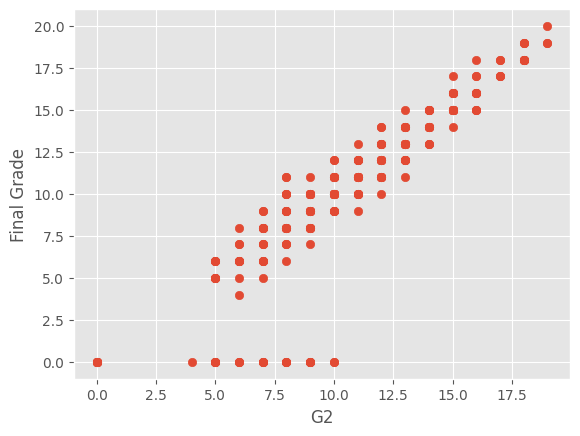

In [13]:
style.use("ggplot")
p = "G2"
pyplot.scatter(data[p], data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("Final Grade")
pyplot.show()
